In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [78]:
@dataclass
class Transmission:
    Fs: int = 1e6
    fc: int = 50e2
    T = 5
    Td = 0.1
    
    
    def __post_init__(self):
        self.t = np.arange(0, self.T, 1/self.Fs)
        self.n_samples = int(self.Td*self.Fs)
        self.n_sym = int(np.floor(np.size(self.t)/self.n_samples))
        
        self.message = self.gen_message()
        
    def gen_message(self):
        rand_n = np.random.rand(self.n_sym)
        rand_n[np.where(rand_n >= 0.5)] = 1
        rand_n[np.where(rand_n <= 0.5)] = 0

        sig = np.zeros(int(self.n_sym*self.n_samples))

        # generating symbols
        id1 = np.where(rand_n == 1)

        for i in id1[0]:
            temp = int(i*self.n_samples)
            sig[temp:temp+self.n_samples] = 1
        return sig
        
    

In [79]:
trans = Transmission()

In [80]:
trans.t.shape

(5000000,)

In [81]:
trans.message.shape

(5000000,)

In [82]:
class Modulator:
    def ask(self, trans):
    
        carrier = np.sin(2*np.pi*trans.fc*trans.t)
        
        return carrier * trans.message
    
    def fsk(self, trans):
        f = trans.fc + trans.fc*trans.message/2
        
        return np.sin(2*np.pi*f*trans.t)
    
    def psk(self, trans):
        
        phase= np.pi + np.pi*trans.message/2
        
        return np.sin(2*np.pi*trans.fc*trans.t + phase)
    
    
    def plot(self, trans): 
        t = trans.t
        sig = trans.message
    
        figure, axis = plt.subplots(4)
        axis[0].plot(t, sig)
        axis[0].set_title("Binary digital data")
        axis[1].plot(t, self.ask(trans), 'r')
        axis[1].set_title("ASK modulated signal")
        axis[2].plot(t, self.fsk(trans), 'r')
        axis[2].set_title("FSK modulated signal")
        axis[3].plot(t, self.psk(trans), 'r')
        axis[3].set_title("PSK modulated signal")
        plt.tight_layout()
        plt.show()
        

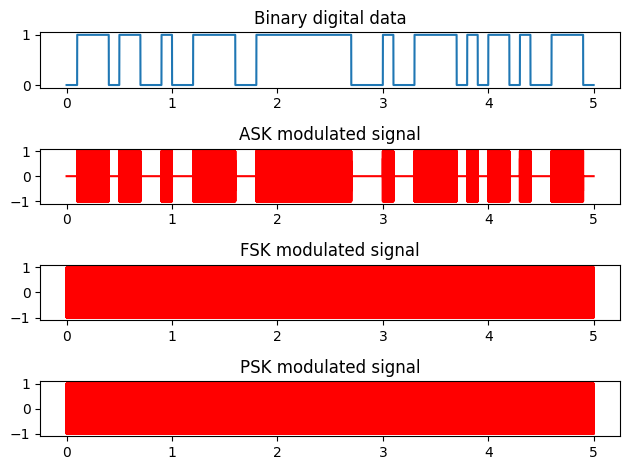

In [83]:
mod = Modulator()
mod.plot(trans)

In [212]:
def create_spectrogram(signal, fft_size):
    num_rows = len(signal) // fft_size # // is an integer division which rounds down
    spectrogram = np.zeros((num_rows, fft_size))
    for i in range(num_rows):
        spectrogram[i,:] = np.log10(np.abs(np.fft.fftshift(np.fft.fft(signal[i*fft_size:(i+1)*fft_size])))**2)
    return spectrogram

In [213]:
s = create_spectrogram(mod.fsk(trans)+ 0.2*np.random.randn(len(mod.fsk(trans))), 2**11)
s[0] = 0

In [214]:
def plot_spectrogram(spectrogram, sample_rate, sig, MHz = False):
    if MHz:
        spectrogram_boundary = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(sig)/sample_rate]
    else:
        spectrogram_boundary = [sample_rate/-2, sample_rate/2, 0, len(sig)/sample_rate]
    
    plt.imshow(spectrogram, aspect='auto', extent = spectrogram_boundary)
    plt.xlabel(f"Frequency [{'MHz' if MHz else 'Hz'}]")
    plt.ylabel("Time [s]")
    plt.show()
    plt.savefig("Test.png", format='png',)

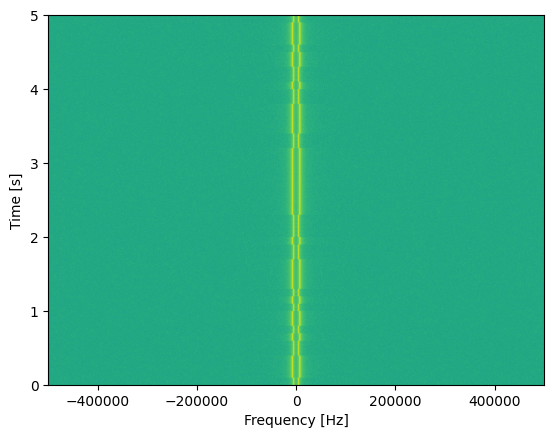

<Figure size 640x480 with 0 Axes>

In [215]:
plot_spectrogram(s, trans.Fs, mod.fsk(trans))

In [216]:
s.shape

(2441, 2048)

In [217]:
s = (s - s.min())/(s.max() - s.min())*.7

In [218]:
#save the psds as numpy bit file.

In [219]:
# scale to be 32 bit

In [220]:
from PIL import Image, ImagePalette
import matplotlib

In [221]:
#im = Image.fromarray(s*255).convert('L').convert("RGB")
cm = matplotlib.cm.get_cmap('viridis') #matplotlib viridis cividis
im = Image.fromarray(np.uint8(cm(s)*255))

In [222]:
im.size

(2048, 2441)

```
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
```

In [223]:
im.show()

In [151]:
im.save("Test.png")